In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


path=r'C:\Users\LENOVO\Documents\Naresh IT\EDA\Visadataset.csv'           
visa_df=pd.read_csv(path) 
visa_df


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns


In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## We have two types of scaling 

    - Z score (Standarization)

    - Min max scalar (Normalisation)


# Z score



<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="clAbadnIL6zN1e8P2LOw6Qc_15" data-atf="4">
             

In [10]:
# step-1: Read prevailing wage column and this is our x from the above formula
# step-2: calculate mean page
# step-3 : calculate std of wage
# step-4 : prewaling_wage-mean
# srep-5: visa_df[prevailing_wage_z]  step4/step3

# this step is nothing but we are doing z score formula in coding format

In [4]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
(wage_data-wage_mean)/wage_std

# this is our z score formula 
# Now just give one variable name to this formula 
# taki vo output me display ho sake
# for eg. visa_df['prevailing_wage_z']

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

In [5]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
visa_df['prevailing_wage_z']=(wage_data-wage_mean)/wage_std

In [6]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


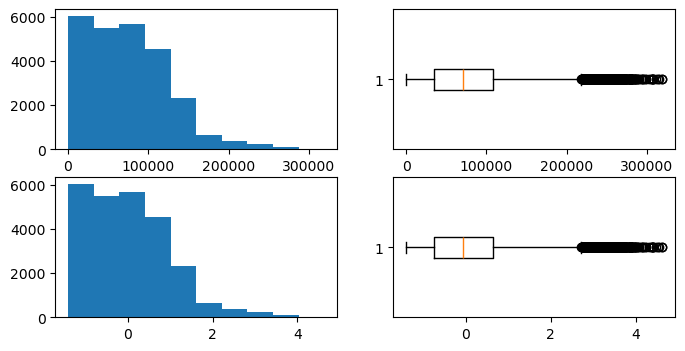

In [13]:
# now apply box plot and check ['prevailing_wage','prevailing_wage_z'] is equal or not


plt.figure(figsize=(8,4))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(2,2,3).hist(visa_df['prevailing_wage_z'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage_z'],vert=False)
plt.show()

In [14]:
# wage_data=visa_df['prevailing_wage']
# wage_mean=wage_data.mean()
# wage_std=wage_data.std()
# visa_df['prevailing_wage_z']=(wage_data-wage_mean)/wage_std

# this is z-score formula 
# and for this we have one package is there that is sklearn
# aur isse hum shortcut bhi kaha sakte hai

## sklearn

    - preprocessing

    - Standarisation

- import the method

- save the method

- apply fit transform

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(visa_df[['prevailing_wage']])

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [20]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z,prevailing_wage_ss
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509


In [21]:
visa_df[['prevailing_wage','prevailing_wage_z','prevailing_wage_ss']]

,prevailing_wage,prevailing_wage_z,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


# Normalisation


$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$


In [7]:
# So here we need do normalisation formula by ourself 
# and It has also package that sir will give later

Normalization is the process of adjusting values measured on different scales to a common scale. There are several types of normalization methods depending on the context. Here are the most common normalization formulas:

---

### 1. **Min-Max Normalization (Rescaling to \[0, 1])**

This is the most common method.

$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

* Where:

  * $X$ is the original value
  * $X_{\text{min}}$ is the minimum value in the dataset
  * $X_{\text{max}}$ is the maximum value in the dataset

---

### 2. **Z-Score Normalization (Standardization)**

Used when data needs to have a mean of 0 and a standard deviation of 1.

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

* Where:

  * $\mu$ is the mean of the dataset
  * $\sigma$ is the standard deviation

---

### 3. **Decimal Scaling Normalization**

Moves the decimal point of values.

$$
X_{\text{normalized}} = \frac{X}{10^j}
$$

* Where $j$ is the smallest integer such that $|X_{\text{normalized}}| < 1$

---

### 4. **Unit Vector Normalization (for vectors)**

Scales a vector so that its magnitude is 1.

$$
X_{\text{normalized}} = \frac{X}{\|X\|}
$$

* Where $\|X\|$ is the Euclidean norm (or magnitude) of the vector.

---

Let me know your use case (e.g., data science, image processing, databases) so I can recommend the best normalization method.


**Min-Max Normalization**


$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$
